<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/master/AndreyEsteban_LizarazoHernandez_proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejecutar** la siguiente celda para **instalar** la versión más actualizada de **tensorflow**/**keras**.

In [7]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Ejecutar** la siguiente celda para **actualizar** la versión de **excel** de python y poder leer los archivos **.csv**.

In [8]:
pip install --upgrade xlrd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Ejecutar** la siguiente celda para **importar** las **librerias** necesarias para el desarrollo de este proyecto.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from keras import models
from keras import layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

**Ejecutar** la siguiente celda para **definir** las **rutas** hacia la ubicación de los archivos **.csv**.

**Modificar** estas rutas para **cambiar** los conjuntos de **datos**.

In [10]:
marketing_campaign_info_path = '/content/bank-full.csv'

**Ejecutar** la siguiente celda para **declarar** algunas **funciones** que ayudan a **visualizar** el conjunto de **datos**.

In [11]:
def stackedbar_dataframe(dataframe, col1, col2, norm=True):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        frames.append(row)
    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    if norm:
        df = df.div(df.sum(axis=1), axis=0)
    return df

def means_dataframe(dataframe, col1, col2):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        row1 = row.mul(row.columns, fill_value=0)
        row1 = pd.DataFrame(row1.sum(axis = 1)/row.sum(axis = 1))
        frames.append(row1)
    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    return df

def plot_stackedbar_chart(dataframe, col1, col2, norm=False):
    df = stackedbar_dataframe(dataframe, col1, col2, norm)
    title = 'Frecuencia de aparición absoluta'
    if norm:
        title = 'Frecuencia de aparición relativa'
    df.plot(kind = 'barh', stacked = True, title = title, mark_right = True)

def plot_mean_chart(dataframe, col1, col2):
    df = means_dataframe(dataframe, col1, col2)
    df.plot(kind = 'barh', title = 'Promedio', mark_right = True)

**Ejecutar** la siguiente celda de código para declarar algunas **funciones** que serán de utilidad para **evaluar** las siguientes características del modelo:
*   **Exactitud**
*   **Precisión**
*   **Sensibilidad**
*   **Especificidad**
*   **Proporción de falsos positivos**

Para esto, las funciones a continuación reciben como entrada el vector de **etiquetas predichas** por algún modelo y el vector de **etiquetas fácticas** para el conjunto de datos de prueba. De esta manera, podemos saber cuántos **verdaderos positivos**, **verdaderos negativos**, **falsos positivos** y **falsos negativos** caracterizan la **matríz de confusión** para la predicción del modelo. Esto último, nos permitirá calcular las medidas de correctitud del modelo y evaluarlo de la manera más objetiva posible.

In [38]:
def plotCM(ytrue, ypred, labels, verbose=True):
    CM = confusion_matrix(ytrue, ypred)
    if verbose:
        ax = sns.heatmap(CM, annot=True, cmap='Blues')
        ax.set_title('Seaborn Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
        plt.show()
    return CM

def calculate_accuracy(CM):
    tn, fp, fn, tp = CM.ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    return accuracy

def calculate_precission(CM):
    tn, fp, fn, tp = CM.ravel()
    precission = tp/(tp+fp)
    return precission

def calculate_sensibility(CM):
    tn, fp, fn, tp = CM.ravel()
    sensibility = tp/(tp+fn)
    return sensibility

def calculate_specificity(CM):
    tn, fp, fn, tp = CM.ravel()
    specificity = tn/(tn+fp)
    return specificity

def calculate_FPP(CM):
    tn, fp, fn, tp = CM.ravel()
    FPP = fp/(tn+fp)
    return FPP

**Ejecutar** la siguiente celda para **cargar** los datos en un **dataframe** de pandas.

In [12]:
marketing_campaign_info = pd.read_csv(marketing_campaign_info_path, delimiter=';')

**Descripción de los datos:**

Campañas de **marketing** para una **entidad bancaria** portuguesa. Las campañas de marketing se basaron en **llamadas telefónicas**.


In [13]:
marketing_campaign_info

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


De las columnas del dataframe, las columnas: **contact** , **day**, **month** y **duration** corresponden a la descripción de la **llamada telefónica**.

De las columnas del dataframe, las columnas: **age**, **job**, **marital**, **education**, **balance** corresponden a la descripción de la **persona encuestada**.

**PRE-PROCESAMIENTO DE LOS DATOS**

Este **pre-procesamiento** de los datos consiste en **convertir** las categorias **cualitativas** en **cuantitativas** en cada columna para poder medir las **distancias** en el modelo de **k-means**.

Como en este caso donde podemos observar que la variable de educación pasa a tener valores numéricos donde "tertiary" va ser 1, "secundary" va ser 0, "primary" va a ser 2 y por último a "unknown" se le asignó el valor de 3. Luego, para material se tiene que "married" va a tomar un valor de 0, "single" un valor de 1, divorced un valor de 2 y así con las variables cualitativas.

In [21]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['education'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[["education"]])
marketing_campaign_info['education'] = encoder.transform(marketing_campaign_info[["education"]])

OrdinalEncoder(categories=[['secondary', 'tertiary', 'primary', 'unknown']])


In [22]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['marital'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['marital']])
marketing_campaign_info['marital'] = encoder.transform(marketing_campaign_info[["marital"]])
marketing_campaign_info

OrdinalEncoder(categories=[['married', 'single', 'divorced']])


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,0.0,1.0,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,1.0,0.0,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,0.0,0.0,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,0.0,3.0,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,1.0,3.0,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0.0,1.0,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,2.0,2.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,0.0,0.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,0.0,0.0,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


En este punto nos percatamos de que hay varias columnas que presentan datos de "yes" o "no", en ese sentido, lo que hicimos fue pasar a binario dichas columnas, de tal forma que el si y el no se vean representados como 0 o 1. Además, para las variables nominales que no tengan un orden jerárquico en sus categorías, una mejor solución es la llamada codificación one-hot que aplicamos a la variable "job", creando una nueva variable binaria (también llamada dummy) por cada categoría existente en la variable a codificar, teniendo como resultado una columna por cada trabajo, pero forma óptima de apreciar este dato.

In [23]:
dummies = pd.get_dummies(marketing_campaign_info['job'], drop_first = True)
marketing_campaign_info = pd.concat([marketing_campaign_info, dummies], axis=1)
marketing_campaign_info = marketing_campaign_info.drop(columns=['job'])

In [24]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['default'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['default']])
marketing_campaign_info['default'] = encoder.transform(marketing_campaign_info[["default"]])
marketing_campaign_info

OrdinalEncoder(categories=[['no', 'yes']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,yes,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,no,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,no,no,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,no,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,no,no,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [25]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['housing'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['housing']])
marketing_campaign_info['housing'] = encoder.transform(marketing_campaign_info[["housing"]])
marketing_campaign_info

OrdinalEncoder(categories=[['yes', 'no']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,no,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,no,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,no,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [26]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['loan'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['loan']])
marketing_campaign_info['loan'] = encoder.transform(marketing_campaign_info[['loan']])
marketing_campaign_info

OrdinalEncoder(categories=[['no', 'yes']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,0.0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,1.0,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,0.0,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,0.0,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [27]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['poutcome'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['poutcome']])
marketing_campaign_info['poutcome'] = encoder.transform(marketing_campaign_info[['poutcome']])
marketing_campaign_info

OrdinalEncoder(categories=[['unknown', 'failure', 'other', 'success']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,0.0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,1.0,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,0.0,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,0.0,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


In [28]:
encoder = OrdinalEncoder(categories=[pd.DataFrame(marketing_campaign_info['y'].value_counts()).index.values.tolist()])
print(encoder)
encoder.fit(marketing_campaign_info[['y']])
marketing_campaign_info['y'] = encoder.transform(marketing_campaign_info[['y']])
marketing_campaign_info

OrdinalEncoder(categories=[['no', 'yes']])


,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,0.0,1.0,0.0,2143,0.0,0.0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,1.0,0.0,0.0,29,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,0.0,0.0,0.0,2,0.0,1.0,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,0.0,3.0,0.0,1506,0.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,1.0,3.0,0.0,1,1.0,0.0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0.0,1.0,0.0,825,1.0,0.0,cellular,17,nov,...,0,0,0,0,0,0,0,1,0,0
45207,71,2.0,2.0,0.0,1729,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45208,72,0.0,0.0,0.0,5715,1.0,0.0,cellular,17,nov,...,0,0,0,1,0,0,0,0,0,0
45209,57,0.0,0.0,0.0,668,1.0,0.0,telephone,17,nov,...,0,0,0,0,0,0,0,0,0,0


Finalmente, después de un análisis de lo que queremos lograr con este proyecto que es desarrollar un sistema de clasificación para determinar si un cliente inscribira un deposito a término o no, decidimos borrar datos que no son muy relevantes para llegar al objetivo.

In [29]:
marketing_campaign_info_copy = marketing_campaign_info.drop(columns=['balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays'])

**MODELO PREDICTOR: RED NEURONAL**

Inicializamos la **variable de regresores**, **X**, y la **variable de etiquetas**, **y**.

In [31]:
X = marketing_campaign_info_copy.loc[:, marketing_campaign_info_copy.columns != 'y']
y = marketing_campaign_info_copy.iloc[:, marketing_campaign_info_copy.columns == 'y']

**Dividimos** el conjunto de datos en **datos de entrenamiento** y **datos de prueba**.

In [45]:
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.33, random_state=42)

A continuación, **definimos**, **compilamos** y **entrenamos** un modelo de **red neuronal**.

In [46]:
network = models.Sequential()
network.add(layers.Dense(19, activation='softplus'))
network.add(layers.Dense(2, activation='softplus'))
network.compile(optimizer = optimizers.Adam(learning_rate=1.2e-2), loss='categorical_crossentropy', metrics=['accuracy'])

epocas = 100

y_train_binary = to_categorical(y_train_def, 2)
y_test_binary = to_categorical(y_test_def, 2)

history = network.fit(X_train_def, y_train_binary, validation_data=(X_test_def, y_test_binary), epochs=epocas, batch_size = 128)

Epoch 1/100
237/237 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8678 - val_loss: 0.3404 - val_accuracy: 0.8829
Epoch 2/100
237/237 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8833 - val_loss: 0.3306 - val_accuracy: 0.8860
Epoch 3/100
237/237 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8853 - val_loss: 0.3276 - val_accuracy: 0.8873
Epoch 4/100
237/237 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8874 - val_loss: 0.3258 - val_accuracy: 0.8879
Epoch 5/100
237/237 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8877 - val_loss: 0.3247 - val_accuracy: 0.8873
Epoch 6/100
237/237 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8878 - val_loss: 0.3409 - val_accuracy: 0.8895
Epoch 7/100
237/237 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8882 - val_loss: 0.3240 - val_accuracy: 0.8887

Los parámetros de la arquitectura de la red han sido previamente escogidos de la mejor manera: la forma cómo los conseguimos fue por medio de las gráficas de predicción y perdida que puede ver a continuación.

A continuación, **graficamos** la evolución del **accuracy** del modelo con el paso de las **épocas** de entrenamiento.

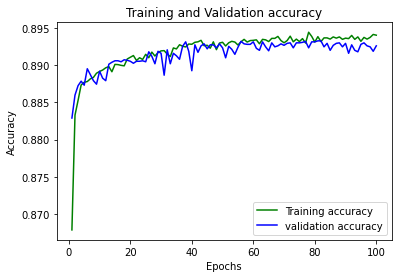

In [48]:
accu_train = history.history['accuracy']
accu_val = history.history['val_accuracy']
epochs = range(1,epocas+1)
plt.plot(epochs, accu_train, 'g', label='Training accuracy')
plt.plot(epochs, accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A continuación, **graficamos** la evolución del **loss** del modelo con el paso de las **épocas** de entrenamiento.

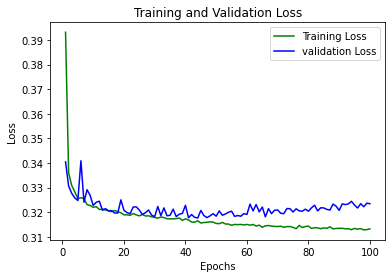

In [49]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epocas+1)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Con la red neuronal entrenada, continuamos a **predecir** la etiqueta de los datos del **conjunto de prueba**. Con estas etiquetas predichas, calculamos la **matríz de confusión** para el modelo e imprimos algunas de las **medidas de correctitud** que caracterizan esta matríz de confusión.

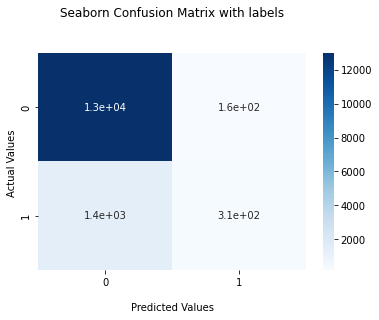

exact: 0.892627345844504  preci: 0.6511627906976745  sensi: 0.17650429799426934  espec: 0.9874762808349146  PFP: 0.012523719165085389


In [50]:
y_proba = network.predict(X_test_def)
y_pred = []
for i in y_proba:
    if (i[0]>i[1]):
        y_pred.append(0)
    else:
        y_pred.append(1)

matriz_confusion = plotCM(y_test_def, y_pred, [0, 1], verbose=True)
exactitud = calculate_accuracy(matriz_confusion)
precision = calculate_precission(matriz_confusion)
sensibilidad = calculate_sensibility(matriz_confusion)
especificidad = calculate_specificity(matriz_confusion)
PFP = calculate_FPP(matriz_confusion)

print('exact:', exactitud, ' preci:', precision, ' sensi:', sensibilidad, ' espec:', especificidad, ' PFP:', PFP)

**Análisis preliminar:**

*   **Exactitud:** el resultado para la medida de exactitud (*exact: 0.8926*) nos dan a entender que el modelo predice muy bien, en términos absolutos: esta distinción es importante, pues como notaremos más adelante, existe una predominancia de la clase ***no subscribió un término***, sobre la clase ***si subscribió un término***, con casi cinco veces el número de observaciones en el conjunto de datos.

*   **Precisión:** el resultado para la medida de precisión (*preci: 0.6511*) nos da a entender que en el 65 prociento de la veces que el modelo predijo que el usuario contratará un término, el usuario, en efecto, contrató el término. Un resultado satisfactorio, en el sentido de que es más probable tener un verdadero positivo que un falso positivo en la predicción de sí el usuario contratará un término. Sin embargo, debemos notar, que el valor de la precisión es más cercano a 0.5 que a 0 o 1. Esto quiere decir que la precisión es casi impredecible: no podemos saber con certeza sí el modelo está siendo preciso o impreciso, ya que el porcentaje de errores en la predicción es casi igual al porcentaje de aciertos.

*   **Sensibilidad:** el resultado para la medida de sensibilidad (*sensi: 0.1765*) amplia el análisis de los dos items anteriores: nos da a entender que el modelo es muy poco efectivo a la hora de predecir cuándo un usuario contratará un término. Este resultado, a diferencia del resultado de la exactitud, nos da a entender que el modelo predice muy mal en términos relativos. Esto puede interpretarse como consecuencia de la siguiente causa:
    1.   Existe una proporción cinco veces mayor de personas que no contrataron el término, en el conjunto de datos. Por esta razón el modelo se entrenó con una sensibilidad mucho menor para detectar las personas que si contrataron el término. Es decir, el modelo es muy preciso a la hora de predecir cuándo una persona no contratará un término, pero muy poco preciso a la hora de predecir cuando si contratará un término, esto explica la alta medida de exactitud, pues se equivoca muy poco en términos absolutos: se equivoca casi siempre al predecir cuando un usuario si contratará un término y casi nunca al predecir cuando no contrará un término, pero como la cantidad de personas que contratan el término es mucho menor que aquellos que no, entonces se equivoca mucho menos que lo que acierta. Esto si lo pudimos detectar con la medida de precisión, ya que su valor es muy cercano a 0.5.

*   **Especificidad:** el resultado para la medida de especificidad (*espec: 0.9874*) complementa lo dicho anteriormente, pues nos da a entender que el modelo se equivoca muy poco a la hora de predecir cuándo un usuario no contratará un término.

*   **PFP:** el resultado para la medida de PFP (*PFP: 0.0125*) nos da a entender que la proporción de falsos positivos es muy baja, lo cual tiene sentido, pues el modelo es muy bueno a la hora predecir cuándo un usuario no contratará un término, haciendo casi imposible que se equivoque diciendo que si cuando en realidad el usuario no contrato un término.






Para solucionar esto, debemos balancear el conjunto de datos de entrenamiento para evitar que una clase predomine sobre la otra. Para hacer esto podemos crear un nuevo conjunto de datos que tenga tantas observaciones de personas que si contrataron el término como de aquellas que no. Razonablemente, podriamos eliminar el exceso de observaciones de personas que no contrataron el término del conjunto de datos y asumir las consecuencias de desechar una gran porción de los datos con el fin de alcanzar una mejor sensibilidad para el modelo.

Para asegurarnos de que la eliminación del exceso de observaciones de la clase es justo, seleccionamos de manera aleatoria las columnas que se eliminan.

In [51]:
marketing_campaign_info_copy2 = marketing_campaign_info_copy

train = resample(marketing_campaign_info_copy2, replace=True, n_samples=(marketing_campaign_info_copy2.shape[0]))
test = marketing_campaign_info_copy2[~marketing_campaign_info_copy2.index.isin(train.index)]

train_no = train[train['y'] == 0]

train_si = train[train['y'] == 1]
train_no_concat = train_no.iloc[0 : train_si.shape[0]]

df_def = pd.concat([train_si, train_no_concat], axis=0)

In [ ]:
X2 = df_def.loc[:, df_def.columns != 'y']
y2 = df_def.iloc[:, df_def.columns == 'y']

A continuación, redefinimos los conjuntos de datos de entrenamiento y de prueba para el nuevo conjunto de datos.

In [ ]:
X_train_def2, X_test_def2, y_train_def2, y_test_def2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

Creamos un nuevo modelo de red neuronal entrenado con el conjunto de datos balanceado y variamos los parámetros de la arquitectura de la red para obtener una mejor predicción: estos se escogieron en base a ensayo y error, concluyendo que eran los que mejor predicen cuándo un usuario contratará un término.

In [52]:
network2 = models.Sequential()
network2.add(layers.Dense(19, activation='sigmoid'))
network2.add(layers.Dense(100, activation='sigmoid')) # <------------------------- EXTRA LAYER
network2.add(layers.Dense(100, activation='sigmoid')) # <------------------------- EXTRA LAYER
network2.add(layers.Dense(2, activation='sigmoid'))
network2.compile(optimizer = optimizers.Adam(learning_rate=1.2e-2), loss='categorical_crossentropy', metrics=['accuracy'])

epocas = 200

y_train_binary2 = to_categorical(y_train_def2, 2)
y_test_binary2 = to_categorical(y_test_def2, 2)

history2 = network2.fit(X_train_def2, y_train_binary2, validation_data=(X_test_def2, y_test_binary2), epochs=epocas, batch_size = 128)

Epoch 1/200
56/56 [==============================] - 1s 7ms/step - loss: 0.7182 - accuracy: 0.5517 - val_loss: 0.6673 - val_accuracy: 0.5796
Epoch 2/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.6348 - val_loss: 0.6577 - val_accuracy: 0.5961
Epoch 3/200
56/56 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.6377 - val_loss: 0.6351 - val_accuracy: 0.6403
Epoch 4/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6291 - accuracy: 0.6408 - val_loss: 0.6236 - val_accuracy: 0.6463
Epoch 5/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6149 - accuracy: 0.6612 - val_loss: 0.6214 - val_accuracy: 0.6492
Epoch 6/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.6522 - val_loss: 0.6228 - val_accuracy: 0.6446
Epoch 7/200
56/56 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.6543 - val_loss: 0.6246 - val_accuracy: 0.6446
Epoch 8/200
5

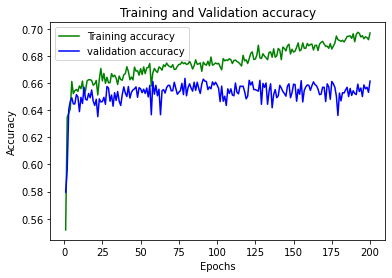

In [56]:
accu_train2 = history2.history['accuracy']
accu_val2 = history2.history['val_accuracy']
epochs = range(1,epocas+1)
plt.plot(epochs, accu_train2, 'g', label='Training accuracy')
plt.plot(epochs, accu_val2, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

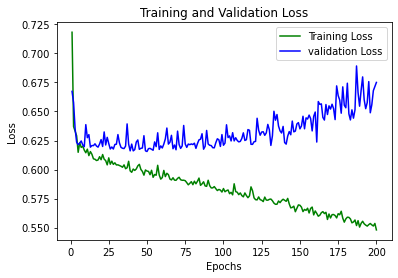

In [57]:
loss_train2 = history2.history['loss']
loss_val2 = history2.history['val_loss']
epochs2 = range(1,epocas+1)
plt.plot(epochs2, loss_train2, 'g', label='Training Loss')
plt.plot(epochs2, loss_val2, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

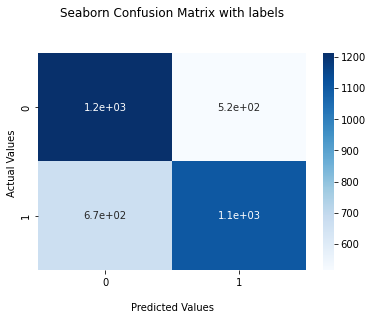

exact: 0.661437535653166  preci: 0.6818742293464858  sensi: 0.622397298818233  espec: 0.7015615962984384  PFP: 0.2984384037015616


In [58]:
y_proba2 = network2.predict(X_test_def2)
y_pred2 = []
for i in y_proba2:
    if (i[0]>i[1]):
        y_pred2.append(0)
    else:
        y_pred2.append(1)

matriz_confusion2 = plotCM(y_test_def2, y_pred2, [0, 1], verbose=True)
exactitud2 = calculate_accuracy(matriz_confusion2)
precision2 = calculate_precission(matriz_confusion2)
sensibilidad2 = calculate_sensibility(matriz_confusion2)
especificidad2 = calculate_specificity(matriz_confusion2)
PFP2 = calculate_FPP(matriz_confusion2)

print('exact:', exactitud2, ' preci:', precision2, ' sensi:', sensibilidad2, ' espec:', especificidad2, ' PFP:', PFP2)

# **empleando k-means para predecir un nuevo usuario**

A continuación, guardamos una copia del conjunto de datos: el conjunto de datos se repartirá de manera aleatoria varias veces durante el **Cross Validation**. Separamos los regresores y la variable objetivo en dos dataframes diferentes.

In [ ]:
X = marketing_campaign_info_copy.loc[:, marketing_campaign_info_copy.columns != 'y']
y = marketing_campaign_info_copy.iloc[:, marketing_campaign_info_copy.columns == 'y']

A continuación, definimos algunas **funcionalidades** necesarias para realizar el **Cross Validation** para distintos valores de los **parámetros** del modelo de **k-means**.

In [35]:
def plotCentroids(kmeans_model):
    # Prediciendo lso grupos
    C = kmeans_model.cluster_centers_

    plt.figure()
    sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='name', data=df_comple, alpha=0.6);
    plt.scatter(C[:, 0], C[:, 1], marker='x', c='black', s=70)
    plt.show()

def generate_kmeans_model(n, X_param, y_param):
    kmeans_model = KMeans(n_clusters=n, random_state=10)
    kmeans_model.fit(X_param)
    return kmeans_model

def predict_class(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    y_pred = [1 if x == label else 0 for x in y_pred]
    y_test_local = [1 if x == label else 0 for x in y_test]
    return y_pred

def plotCM_class(model, X_test, y_test, label, verbose=True):
    lista = []
    for index, row in y_test.iterrows():
        lista.append(row['y'])
    CM = plotCM(lista, predict_class(model, X_test, y_test, label), [0, 1], verbose)
    return CM

def cross_validate_kmeans(N, label):
    for n in range(1, N):
        print('generating k means model with hyper-parameters: ', n)
        kf = KFold(n_splits=10) 
        kf.get_n_splits(X)
        history_validation = pd.DataFrame()
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model = generate_kmeans_model(n, X_train, y_train)
            matriz_confusion = plotCM_class(model, X_test, y_test, label, False)
            exactitud = calculate_accuracy(matriz_confusion)
            precision = calculate_precission(matriz_confusion)
            sensibilidad = calculate_sensibility(matriz_confusion)
            especificidad = calculate_specificity(matriz_confusion)
            PFP = calculate_FPP(matriz_confusion)
            pd_validation = pd.DataFrame(data={
                'exact': exactitud,
                'prec': precision,
                'sens': sensibilidad,
                'espec': especificidad,
                'FPP': PFP
            }, index = [n])

            history_validation = pd.concat(objs=[history_validation, pd_validation])
        print('Cross validation measures with hyper-parameters: ', n)
        print(history_validation.mean(axis = 0))

Realizamos **Cross Validation** sobre el conjunto de **datos de entrenamiento** variando el **número de clusters** entre $1$ y $N$.

In [ ]:
cross_validate_kmeans(10, 0.0)

A continuación, **escogemos** el **modelo** de **k-means** **óptimo** de acuerdo a las medidas de **correctitud** extraidas de su **matríz de confusión**. Para este modelo, **graficamos** su **matríz** de confusión e **imprimimos** las **medidas** que caracterizan esta matríz.

In [ ]:
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.33, random_state=42)
kmeans_model_def = KMeans(n_clusters=2, random_state=10)
kmeans_model_def.fit(X_train_def)

print(y_train_def)

matriz_confusion_def = plotCM_class(kmeans_model_def, X_test_def, y_test_def, 1.0, True)
exactitud = calculate_accuracy(matriz_confusion_def)
precision = calculate_precission(matriz_confusion_def)
sensibilidad = calculate_sensibility(matriz_confusion_def)
especificidad = calculate_specificity(matriz_confusion_def)
PFP = calculate_FPP(matriz_confusion_def)

print('exact:', exactitud, ' preci:', precision, ' sensi:', sensibilidad, ' espec:', especificidad, ' PFP:', PFP)

In [ ]:
predic = pd.DataFrame(kmeans_model_def.predict(X_test_def)).set_index(X_test_def.index)
dataset_def = pd.concat([X_test_def, predic], axis=1)
dataset_def

In [ ]:
cluster = dataset_def[dataset_def[0]==3]
cluster

In [ ]:
cluster = dataset_def[dataset_def[0]==0]
plot_stackedbar_chart(cluster, 'age', 'retired', True)

In [ ]:
dataset_def2 = pd.concat([dataset_def, y_test_def], axis=1)
dataset_def2

In [ ]:
cluster2 = dataset_def2[dataset_def2[0]==0]
plot_stackedbar_chart(cluster2, 'housing', 'y', False)